<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Decomposition

<h2><a id = "A">Time Series Decomposition</a></h2>

Splitting a time series into several components is useful for both understanding the data and diagnosing the appropriate forecasting model. Each of these components will represent an underlying pattern. 

- **Trend**: A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes, we will refer to a trend “changing direction” when, for example, it might go from an increasing trend to a decreasing trend.


- **Seasonal**: A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.


- **Residual**: The leftover or error component.

We are going to play around with some bus data from Portland, Oregon. Load in the data set and check it out.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import *
%matplotlib inline

bus = pd.read_csv("assets/data/bus.csv", names=["month", "avg_riders"])
bus.head()

,month,avg_riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [2]:
bus.tail()

,month,avg_riders
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


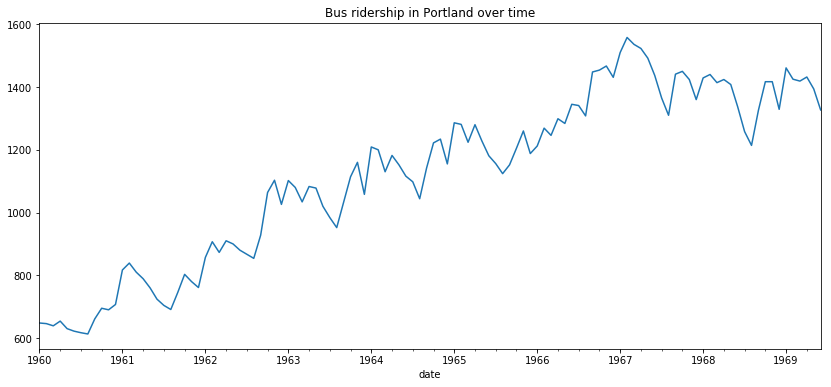

In [3]:
bus["date"] = pd.to_datetime(bus["month"], format="%Y-%m")
riders = bus.set_index("date")["avg_riders"]
riders.plot(figsize=(14, 6), title="Bus ridership in Portland over time");

### StatsModels Time Series Tools 

The Python StatsModels library offers a wide variety of reliable time series analysis tools. We'll start off by loading the autocorrelation and partial autocorrelation functions, as well as a function for decomposing time series.

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Plot the raw data.

We can look at the raw data first. Let's plot the time series.

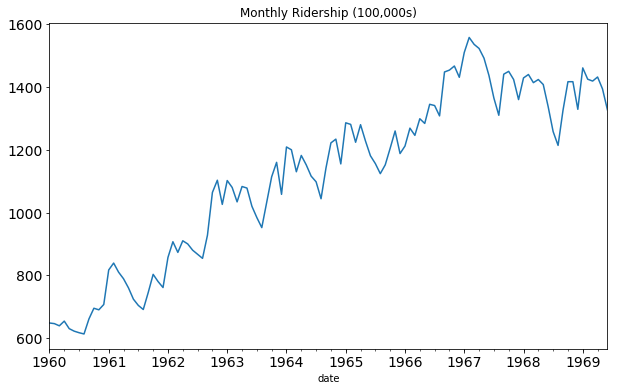

In [5]:
riders.plot(figsize=(10,6), title= 'Monthly Ridership (100,000s)', fontsize=14)

<h2><a id = "B">Decompose the time series and plot using the `.seasonal_decompose()` function.</a></h2>

Using the `seasonal_decompose()` function, we can break the time series into its constituent parts.

Use the function on the `riders` data with a frequency of `12`, then plot the data. We're using a frequency of 12 because the data are monthly.

The decomposition object from `seasonal_decompose()` has a `.plot()` function, like with Pandas DataFrames.

<Figure size 432x288 with 0 Axes>

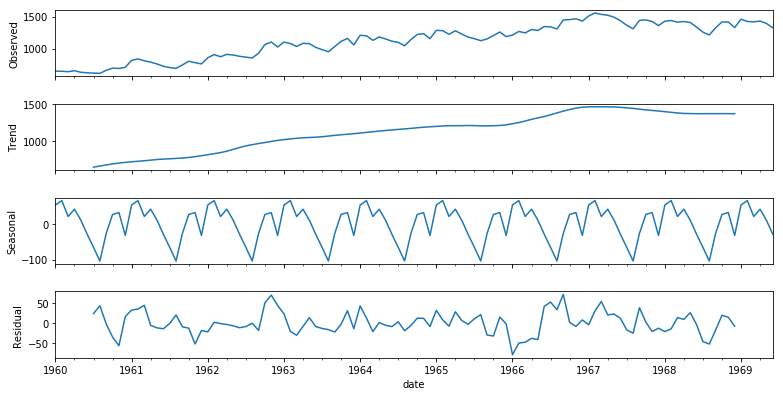

In [6]:
decomposition = seasonal_decompose(riders, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 6)

### Plot a single component of the decomposition plot.

We can pull out just one component of the decomposition plot.

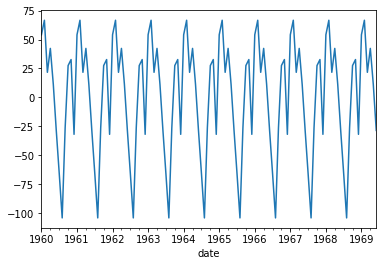

In [7]:
seasonal = decomposition.seasonal 
seasonal.plot()

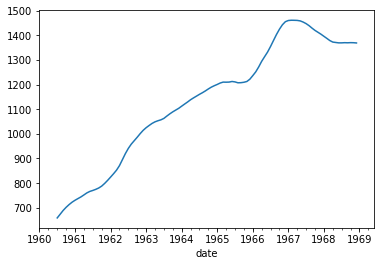

In [8]:
trend = decomposition.trend
trend.plot()

<h2><a id = "C">Examining the residuals and their ACF and PACF.</a></h2>

Let's examine the residuals of our data.

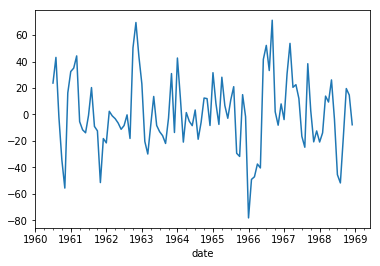

In [9]:
resid = decomposition.resid
resid.plot()

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

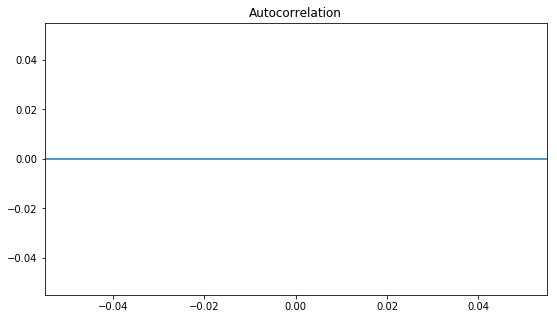

In [11]:
fig, ax = plt.subplots(figsize=(9,5))
plot_acf(resid, lags=30, ax = ax)
plt.show()

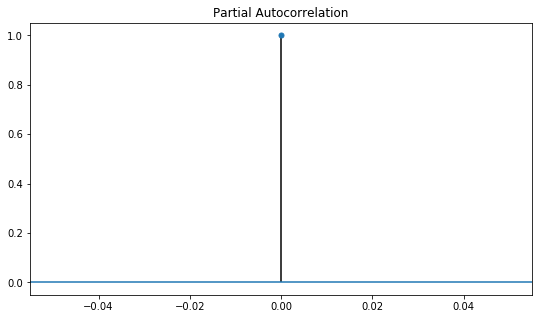

In [12]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(resid, lags=30, ax=ax)
plt.show()

We notice that the residuals of our time series don't have significant autocorrelation. This is because the trend and seasonal components have been taken out and adjusted for. 

<h2><a>Recap</a></h2>

* Trend is a long-term change in the data. 


* Seasonality is a pattern of a fixed period that repeats in the data. 


* Residuals are the error components of the data.


* StatsModels contains a `seasonal_decompose()` function that breaks a time series into its components.